## Problem: Detect Cycles in 2D Grid
https://leetcode.com/problems/detect-cycles-in-2d-grid/

Given a 2D array of characters grid of size m x n, you need to find if there exists any cycle consisting of the same value in grid.

A cycle is a path of length 4 or more in the grid that starts and ends at the same cell. From a given cell, you can move to one of the cells adjacent to it - in one of the four directions (up, down, left, or right), if it has the same value of the current cell.

Also, you cannot move to the cell that you visited in your last move. For example, the cycle (1, 1) -> (1, 2) -> (1, 1) is invalid because from (1, 2) we visited (1, 1) which was the last visited cell.

Return true if any cycle of the same value exists in grid, otherwise, return false.

 

Example 1:

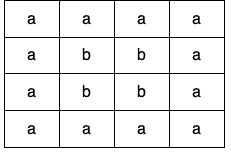

    Input: grid = [["a","a","a","a"],["a","b","b","a"],["a","b","b","a"],["a","a","a","a"]]
    Output: true
    Explanation: There are two valid cycles shown in different colors in the image below:

Example 2:



    Input: grid = [["c","c","c","a"],["c","d","c","c"],["c","c","e","c"],["f","c","c","c"]]
    Output: true
    Explanation: There is only one valid cycle highlighted in the image below:

Example 3:



    Input: grid = [["a","b","b"],["b","z","b"],["b","b","a"]]
    Output: false
 

Constraints:

    m == grid.length
    n == grid[i].length
    1 <= m, n <= 500
    grid consists only of lowercase English letters.


In [96]:
def containsCycle(grid):
    n = len(grid)
    m = len(grid[0])
    visited = [[False] * m for _ in range(n)]
    for i in range(len(grid)):
        for j in range(len(grid[i])):
            if visited[i][j] == False:
                if explore(i, j, grid,visited, -1,-1): ## Here, -1, and -1 is the parent coordinate, started with -1
                    return True
    return False

def explore(row, col, grid, visited,pr, pc):
    value = grid[row][col]
    visited[row][col] = True
    nbrs = getNeighbours(row, col, grid)
    for nr, nc in nbrs:
        if grid[nr][nc] != value or (nr == pr and nc == pc):
            continue
        if visited[nr][nc]:
                return True
        if explore(nr, nc, grid, visited,row, col):
            return True
    return False

def getNeighbours(row, col, grid):
    nrs = []
    if row > 0:
        nrs.append((row-1, col))
    if row < len(grid)-1:
        nrs.append((row+1, col))
    if col > 0:
        nrs.append((row, col-1))
    if col<len(grid[row]) - 1:
        nrs.append((row, col+1))
    return nrs

In [97]:
grid = [["a","a","a","a"],["a","b","b","a"],["a","b","b","a"],["a","a","a","a"]]
containsCycle(grid)

True

In [98]:
grid = [["a","b","b"],["b","z","b"],["b","b","a"]]
containsCycle(grid)

False

In [99]:
grid = [["c","c","c","a"],["c","d","c","c"],["c","c","e","c"],["f","c","c","c"]]
containsCycle(grid)

True